Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


importing data for model training

In [2]:
file_path = r"C:\Users\viraj\OneDrive\Desktop\DataAnalytics Project\churn sql and power bi\data.xlsx"
train_sheet = "vw_ChurnData"
new_data_sheet = "vw_JoinData"

data = pd.read_excel(file_path, sheet_name=train_sheet)

In [3]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [4]:
data.info

<bound method DataFrame.info of      Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0      11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1      11114-PUN    Male   51      No          Punjab                    5   
2      11167-WES  Female   43     Yes     West Bengal                    3   
3      11179-MAH    Male   35      No     Maharashtra                   10   
4      11180-TAM    Male   75     Yes      Tamil Nadu                   12   
...          ...     ...  ...     ...             ...                  ...   
6002   99898-MAH  Female   39      No     Maharashtra                    2   
6003   99912-WES  Female   60     Yes     West Bengal                   11   
6004   99942-KER    Male   59     Yes          Kerala                    8   
6005   99942-TEL  Female   34      No       Telangana                    0   
6006   99962-AND  Female   63      No  Andhra Pradesh                    7   

      Tenure_in_Months Value_De

In [6]:
# Drop unnecessary columns
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [7]:
# Columns to encode
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_Movies', 'Streaming_TV',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method'
]

# Encode categorical variables
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Encode target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,2,0,0,95.099998,6683.399902,0.00,0,631.719971,7315.120117,0
1,1,51,0,15,5,9,4,1,0,1,...,0,1,0,49.150002,169.050003,0.00,10,122.370003,301.420013,1
2,0,43,1,21,3,28,0,1,1,1,...,2,1,0,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,0
3,1,35,0,12,10,12,5,1,0,1,...,2,1,1,84.400002,5969.299805,0.00,0,219.389999,6188.689941,0
4,1,75,1,17,12,27,1,1,0,1,...,2,1,1,72.599998,4084.350098,0.00,140,332.079987,4556.430176,0


Splitting data for training and testing

In [10]:
# Split into features (X) and target (y)
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Save the model
joblib.dump(best_rf_model, "rf_model.pkl")

['optimized_rf_model.pkl']

Let's Evaluate model

In [12]:
# Predictions
y_pred = best_rf_model.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[785  62]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       847
           1       0.79      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.79      0.80      1202
weighted avg       0.84      0.84      0.84      1202



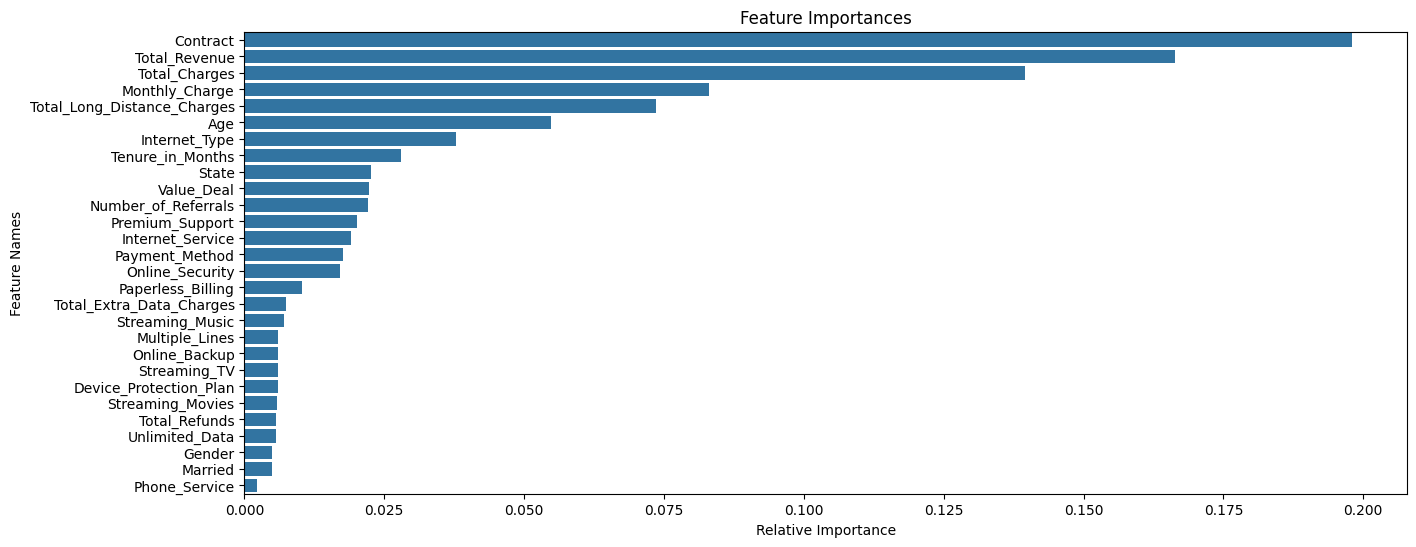

In [13]:
# Feature Importance Plot
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

Use the model for predictions on new data

In [14]:
# Load new data
new_data = pd.read_excel(file_path, sheet_name=new_data_sheet)

# Keep original data for reference
original_data = new_data.copy()

# Retain Customer_IDs
customer_ids = new_data['Customer_ID']

# Drop columns not used in prediction
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode new data using existing label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [15]:
# Predict on new data
new_predictions = best_rf_model.predict(new_data)
new_probabilities = best_rf_model.predict_proba(new_data)[:, 1]

# Add predictions and probabilities to the original data
original_data['Predicted_Customer_Status'] = new_predictions
original_data['Churn_Probability'] = new_probabilities

original_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Predicted_Customer_Status,Churn_Probability
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others,1,0.960176
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others,1,0.768852
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others,1,0.989759
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others,1,0.929759
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others,1,0.980838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,99488-KAR,Male,50,Yes,Karnataka,10,31,NaN,No,No,...,24.400000,0.0,0,0.000000,24.400000,Joined,Others,Others,1,0.951537
407,99515-ASS,Male,34,No,Assam,11,11,NaN,Yes,Yes,...,209.899994,0.0,0,128.039993,337.940002,Joined,Others,Others,1,0.538399
408,99855-MAH,Female,50,Yes,Maharashtra,5,29,NaN,Yes,No,...,135.199997,0.0,0,31.340000,166.539993,Joined,Others,Others,1,0.966335
409,99862-BIH,Female,30,No,Bihar,12,9,Deal 5,Yes,No,...,74.000000,0.0,0,23.700001,97.699997,Joined,Others,Others,1,0.978000


In [16]:
# Filter churned customers
churned_customers = original_data[original_data['Predicted_Customer_Status'] == 1]

# Save results
output_path = r"C:\Users\viraj\OneDrive\Desktop\DataAnalytics Project\churn sql and power bi\predictions.csv"
churned_customers.to_csv(output_path, index=False)

print(f"Predictions saved successfully to {output_path}!")

Predictions saved successfully to C:\Users\viraj\OneDrive\Desktop\DataAnalytics Project\churn sql and power bi\Enhanced_Predictions.csv!
